<a href="https://colab.research.google.com/github/Kiongo-Bob/Water_quality_project/blob/main/Water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mounting the G-Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Confriming access to the home directory
!pwd

#Navigating to the project folder
%cd /content/gdrive/My\ Drive/Kaggle/Water

/content
/content/gdrive/My Drive/Kaggle/Water


In [4]:
# Import dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as stats

In [5]:
# Enable entire dataframe display
pd.set_option('display.max_columns',None)

In [6]:
# Load the data
data = pd.read_csv('water_potability.csv')

**Dataset Analysis**

In [7]:
# Description of the pandas dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
# Statisctical description of the data
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
# Checking dataframe shape
data.shape

(3276, 10)

In [10]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [11]:
# Checking for duplicates
data.duplicated().sum()

0

In [12]:
#  Checking the sum of null values for each column
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

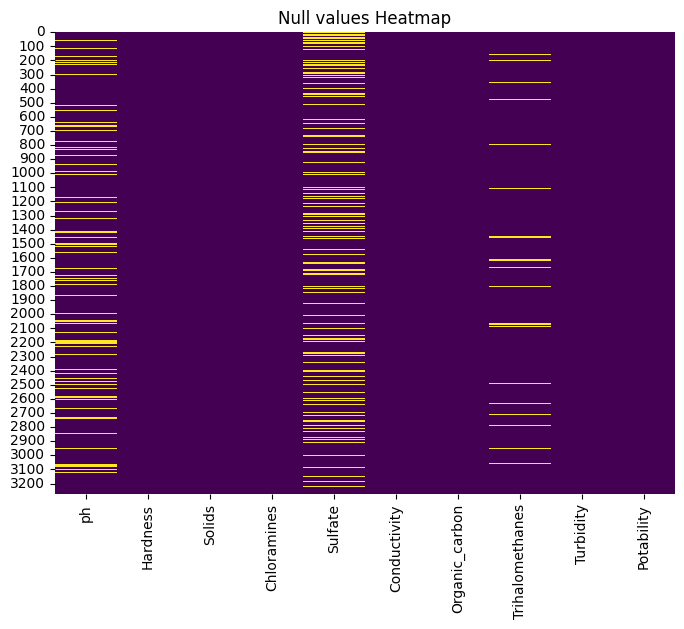

In [13]:
# Visualize the missing values
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Null values Heatmap')
plt.show()

In [14]:
# Plotting the statistics for ph, Sulfate and Trihalomethanes
mean_values = data[['ph', 'Sulfate','Trihalomethanes']].mean()
median_values = data[['ph', 'Sulfate','Trihalomethanes']].median()
mode_values = data[['ph', 'Sulfate','Trihalomethanes']].mode().iloc[0]



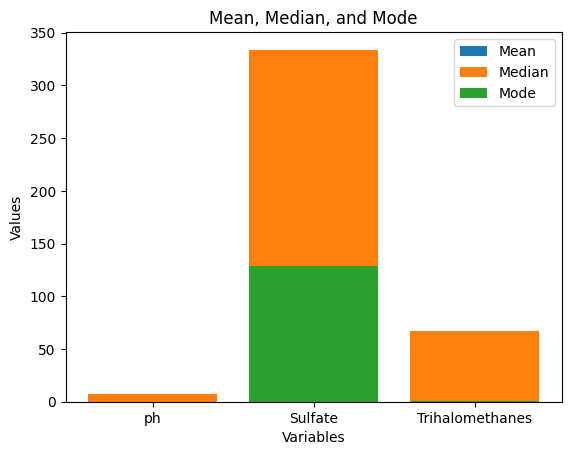

In [15]:
# Plotting the statistics for ph, Sulfate and Trihalomethanes
variables = ['ph', 'Sulfate','Trihalomethanes']
plt.bar(variables, mean_values, label='Mean')
plt.bar(variables, median_values, label='Median')
plt.bar(variables, mode_values, label='Mode')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Mean, Median, and Mode')
plt.legend()
plt.show()


In [38]:
# A list of columns with missing data
missing_col_values = ['ph', 'Sulfate','Trihalomethanes']

In [43]:
missing_col_values = data[missing_col_values]

ValueError: ignored

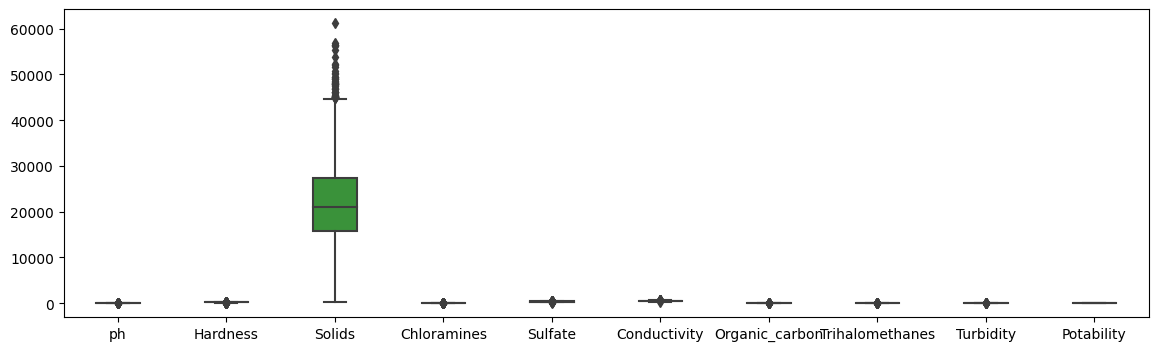

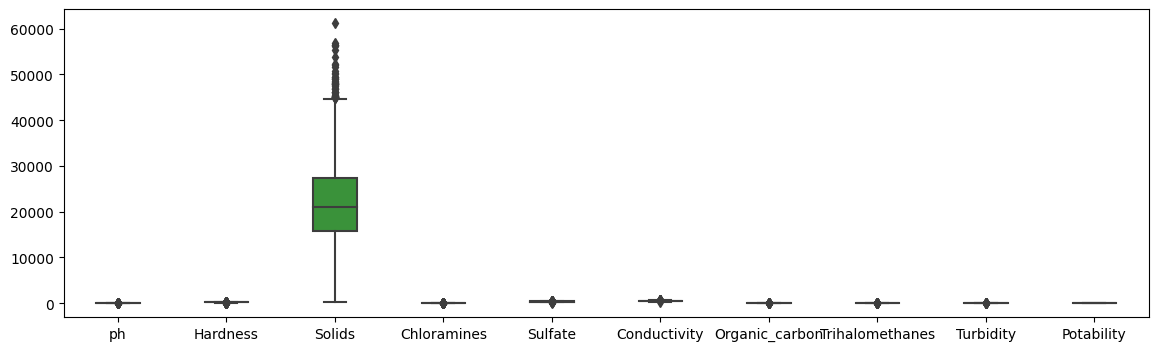

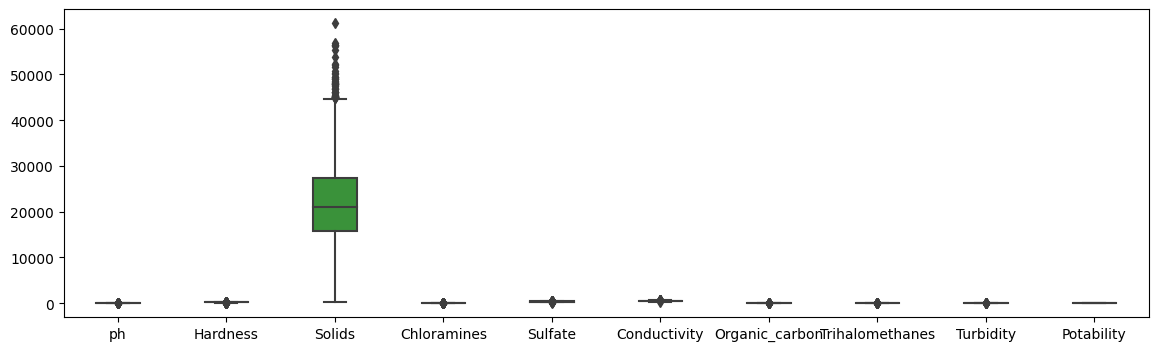

In [56]:
for column in missing_col_values:
  plt.figure(figsize=(14,4))
  sns.boxplot(data,width=0.4)
  plt.subplots_adjust(hspace=5)

In [16]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [26]:
df1=data[['Hardness','Conductivity','Potability']]

In [28]:
type(df1)
df1.head()

,Hardness,Conductivity,Potability
0,204.890455,564.308654,0
1,129.422921,592.885359,0
2,224.236259,418.606213,0
3,214.373394,363.266516,0
4,181.101509,398.410813,0


In [31]:
df1.isnull().sum()

Hardness        0
Conductivity    0
Potability      0
dtype: int64

In [35]:
df1[df1['Potability'] == 1].sum()

Hardness        250233.351168
Conductivity    543640.496373
Potability        1278.000000
dtype: float64

In [36]:
df1[df1['Potability'] == 0].sum()

Hardness        393073.117785
Conductivity    852607.446223
Potability           0.000000
dtype: float64